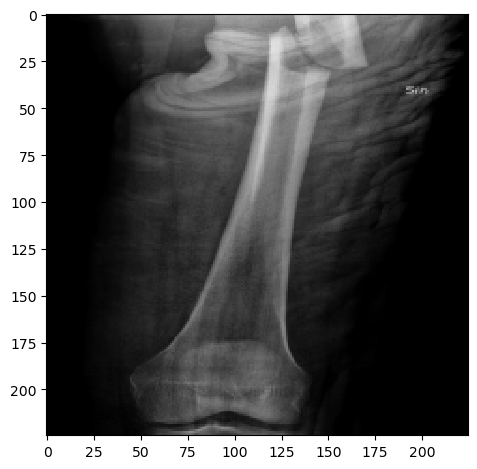

In [1]:
import skimage
import cv2
import matplotlib
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pylab
import matplotlib.image as mpimg

from scipy import ndimage
from skimage import morphology
io.use_plugin('matplotlib')


#conda install cv2
#pip install opencv-python




from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
import os



# PUT IN LOOP
img = cv2.imread("/local/data1/chash345/images/patient_1206_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_2.png")



width = 225
height = 225
dim = (width, height)



# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
io.imshow(resized)
io.show()

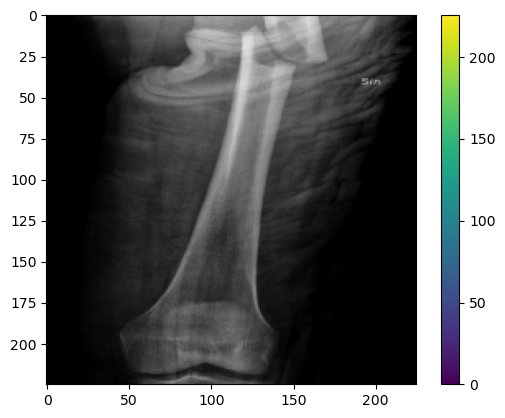

In [3]:
plt.imshow(resized)
plt.colorbar()


In [4]:
resized.shape 

(225, 225, 3)

In [5]:
resized.mean()

46.37272098765432

In [6]:
np.amin(resized)

0

In [7]:
np.amax(resized)

226

In [8]:
resized.size

151875

/tmp/ipykernel_22608/2047604118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resized.ravel(),


Text(0, 0.5, '# Pixels in Image')

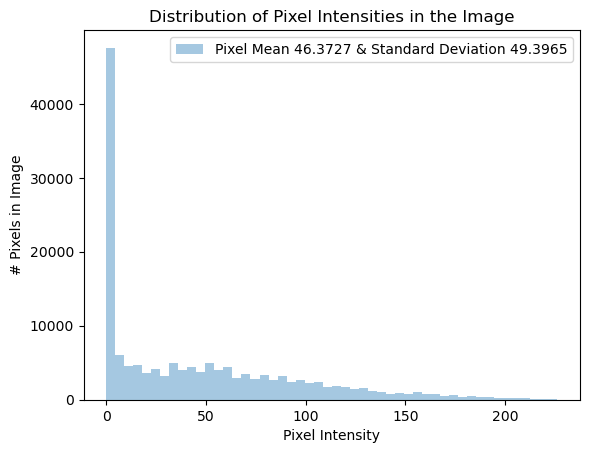

In [9]:
sns.distplot(resized.ravel(),
             label=f"Pixel Mean {np.mean(resized):.4f} & Standard Deviation {np.std(resized):.4f}", kde=False)
plt.legend(loc='upper right')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

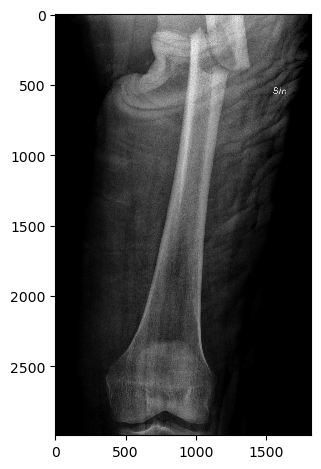

In [11]:
img = cv2.imread("../images/patient_1206_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_2.png")
io.imshow(img)
io.show()

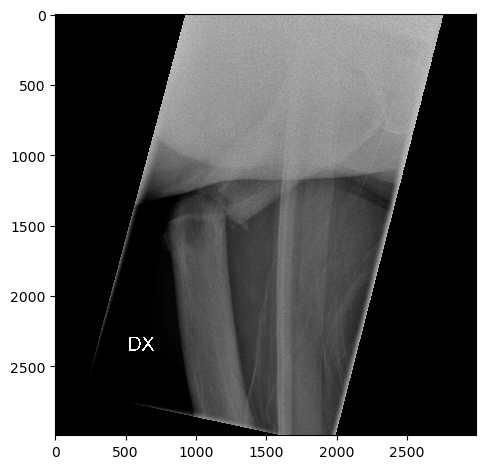

In [12]:
img = cv2.imread("../images/patient_1215_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_2.png")
io.imshow(img)
io.show()

In [16]:
img.shape

(2990, 2990, 3)

In [13]:
img = cv2.imread("../images/patient_9_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_2.png")

#get size
height = img.shape[0]
width = img.shape[1]
img.shape

(2688, 1552, 3)

In [14]:
# Create a black image
x = height if height > width else width
y = height if height > width else width
squared_image= np.zeros((x,y,3), np.uint16)

squared_image[int((y-height)/2):int(y-(y-height)/2), int((x-width)/2):int(x-(x-width)/2)] = img



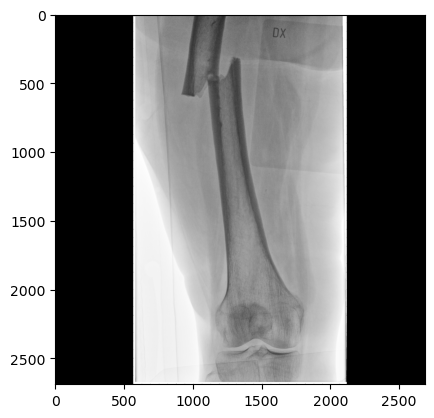

(2688, 2688, 3)

In [15]:
plt.imshow(squared_image)
io.show()
squared_image.shape

In [16]:
np.amin(squared_image)

0

In [17]:
np.amax(squared_image)

255

In [142]:
squared_image = cv2.cvtColor(squared_image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('resized.png', squared_image)

True

/home/chash345/.conda/envs/research/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


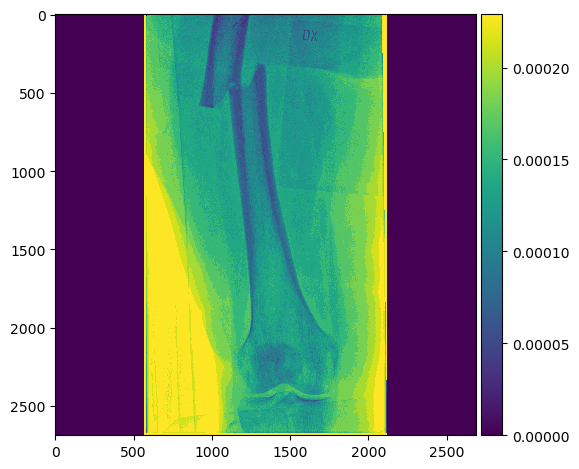

(2688, 2688)

In [143]:
resizedd = plt.imread("resized.png")
io.imshow(resizedd)
io.show()
resizedd.shape

In [132]:
resizedd.max()

0.00022888533

In [133]:
resizedd.min()

0.0

In [69]:
image_names = os.listdir('../valid/aff')
len(image_names)

175

In [6]:
class_dict ={'control':[], 'aff':[]}
for i in image_names:
    if 'CONTROL' in i.split('_'):
        class_dict['control'].append(i)
    else:
        class_dict['aff'].append(i)
    continue

In [7]:
len(class_dict['aff'])

868

In [8]:
len(class_dict['control'])

3467

In [9]:
class_dict['control'].sort()

In [10]:
class_dict['aff'].sort()

In [11]:
train_control_indexlist = class_dict['control'][:(int(len(class_dict['control']) * .6))]

In [13]:
train_aff_indexlist = class_dict['aff'][:(int(len(class_dict['aff']) * .6))]

In [14]:
len(train_aff_indexlist)

520

In [15]:
len(train_control_indexlist)

2080

In [16]:
valid_control_indexlist = class_dict['control'][len(train_control_indexlist):2775]

In [17]:
valid_aff_indexlist = class_dict['aff'][len(train_aff_indexlist):695]

In [18]:
len(valid_aff_indexlist)

175

In [19]:
len(valid_control_indexlist)

695

In [20]:
test_control_indexlist =  class_dict['control'][2776:]

In [21]:
test_aff_indexlist =  class_dict['aff'][695:]

In [22]:
len(test_aff_indexlist)

173

In [23]:
len(test_control_indexlist)

691

In [24]:
def filter_list(string, substr): 
    return [st for st in string if any(sub in st for sub in substr)]

In [54]:
valid_control_filtered_list= filter_list(image_names, valid_control_indexlist)

In [50]:
valid_aff_filtered_list= filter_list(image_names, valid_aff_indexlist)

In [57]:
test_control_filtered_list= filter_list(image_names, test_control_indexlist)

In [60]:
test_aff_filtered_list= filter_list(image_names, test_aff_indexlist)

In [61]:
len(valid_aff_filtered_list)

175

In [62]:
old_path = '../images'
new_path = '../test/aff/'

In [63]:
for filename in os.listdir(old_path):
    if filename in test_aff_filtered_list:

        # open the file
        img = cv2.imread('../images/' + filename)
        height = img.shape[0]
        width = img.shape[1]

        # Create a black image
        x = height if height > width else width
        y = height if height > width else width
        squared_image = np.zeros((x,y,3), np.uint8)

        # create padding
        squared_image[int((y-height)/2):int(y-(y-height)/2), int((x-width)/2):int(x-(x-width)/2)] = img

        cv2.imwrite(new_path + filename, squared_image)


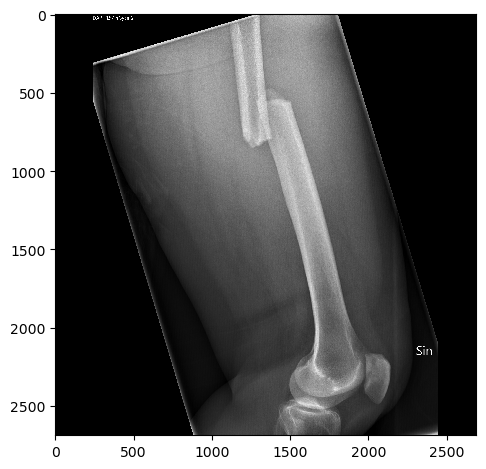

In [70]:
sample = cv2.imread('../train/aff/patient_1213_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_5.png')
io.imshow(sample)

In [71]:
sample.shape

(2688, 2688, 3)